In [80]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

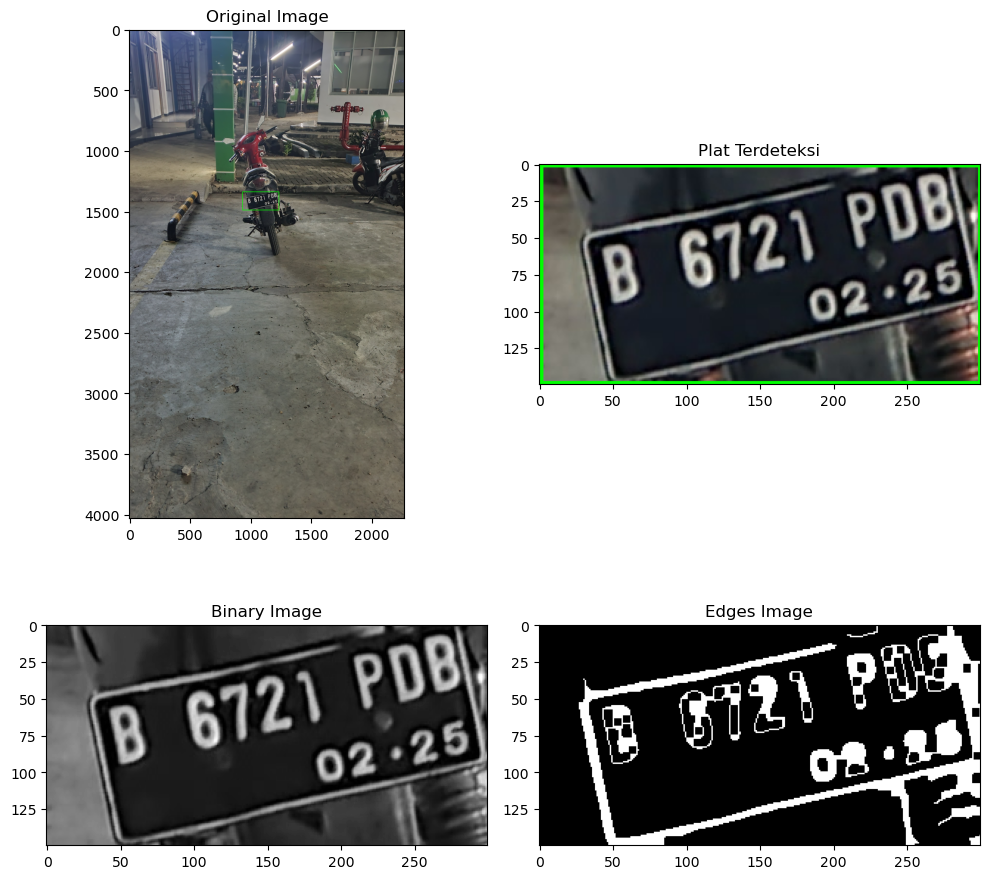

In [82]:
def detect_license_plate(image_path):
    # Membaca gambar asli
    image = cv2.imread(image_path)

    # Mengubah gambar menjadi ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform edge detection
    edges = cv2.Canny(gray, 70, 500)

    # Melakukan operasi morfologi untuk meningkatkan tepi
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    edges  = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Untuk Temukan kontur plat nomor
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter and sort the contours berdasarkan areanya
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

    # Iterate over the contours and draw bounding rectangles around the license plates
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        w = 300  # Panjang
        h = 150  # Lebar
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)

        # Untuk Pangkas wilayah plat nomor
        plate_image = image[y:y + h, x:x + w]
        plate_binary = gray[y:y + h, x:x + w]
        plate_edges = edges[y:y + h, x:x + w]

    # Menampilkan the original image, detected license plate, binary image, and edges image
    plt.figure(figsize=(10, 10))

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")


    # Plat nomor terdeteksi
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))
    plt.title("Plat Terdeteksi")


    # Binary image
    plt.subplot(2, 2, 3)
    plt.imshow(plate_binary, cmap="gray")
    plt.title("Binary Image")


    # Edges image
    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(plate_edges, cv2.COLOR_BGR2RGB))
    plt.title("Edges Image")


    # Show the plots
    plt.tight_layout()
    plt.show()

# Path to the image
image_path = "PlatMotorJauh.jpg"

# Call the function to detect the license plate
detect_license_plate(image_path)
